___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** Does the customer have a credit card or not?
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [44]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [45]:
churn_modelling = pd.read_csv("Churn_Modelling.csv")

In [46]:
df = churn_modelling.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
df.shape

(10000, 14)

In [49]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


<Axes: >

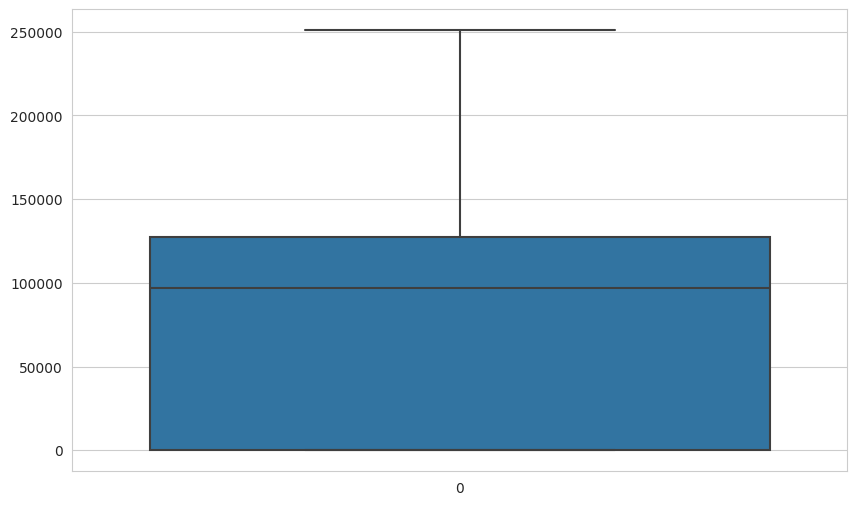

In [52]:
sns.boxplot(df["Balance"])

In [53]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

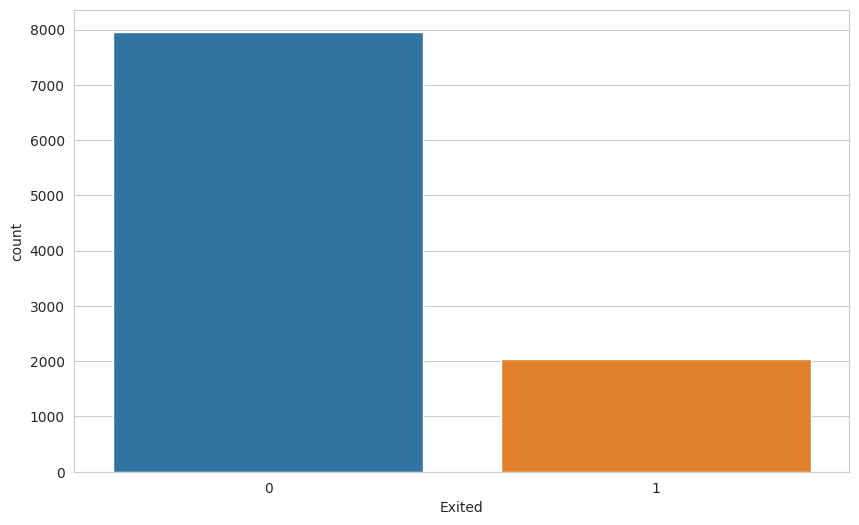

In [142]:
sns.countplot(data=df, x='Exited')
plt.show()
# There seems to be an imbalance situation, but we will make a definitive decision after evaluating the model's performance."

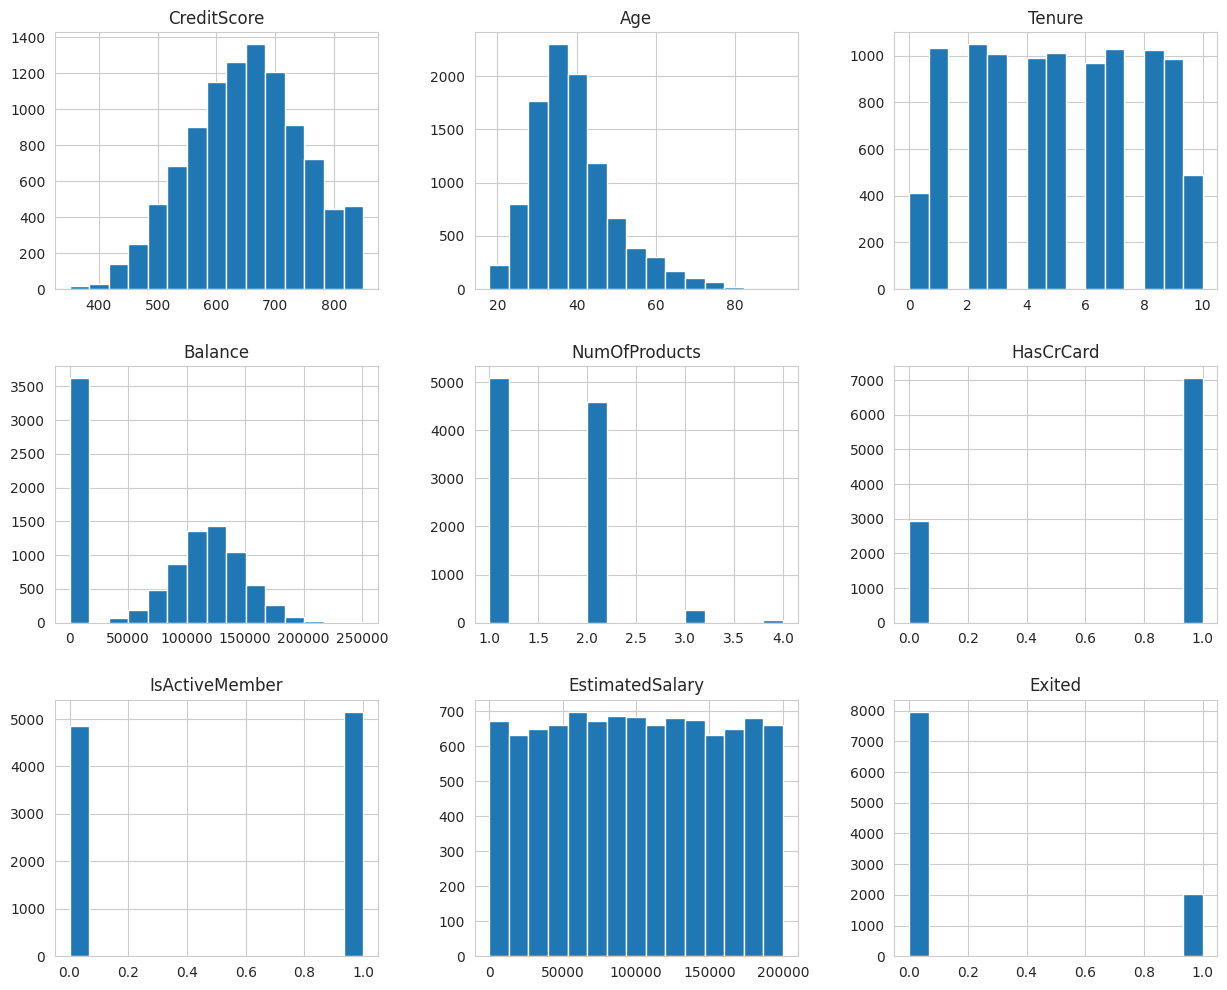

In [56]:
df.hist(figsize=(15,12), bins=15);

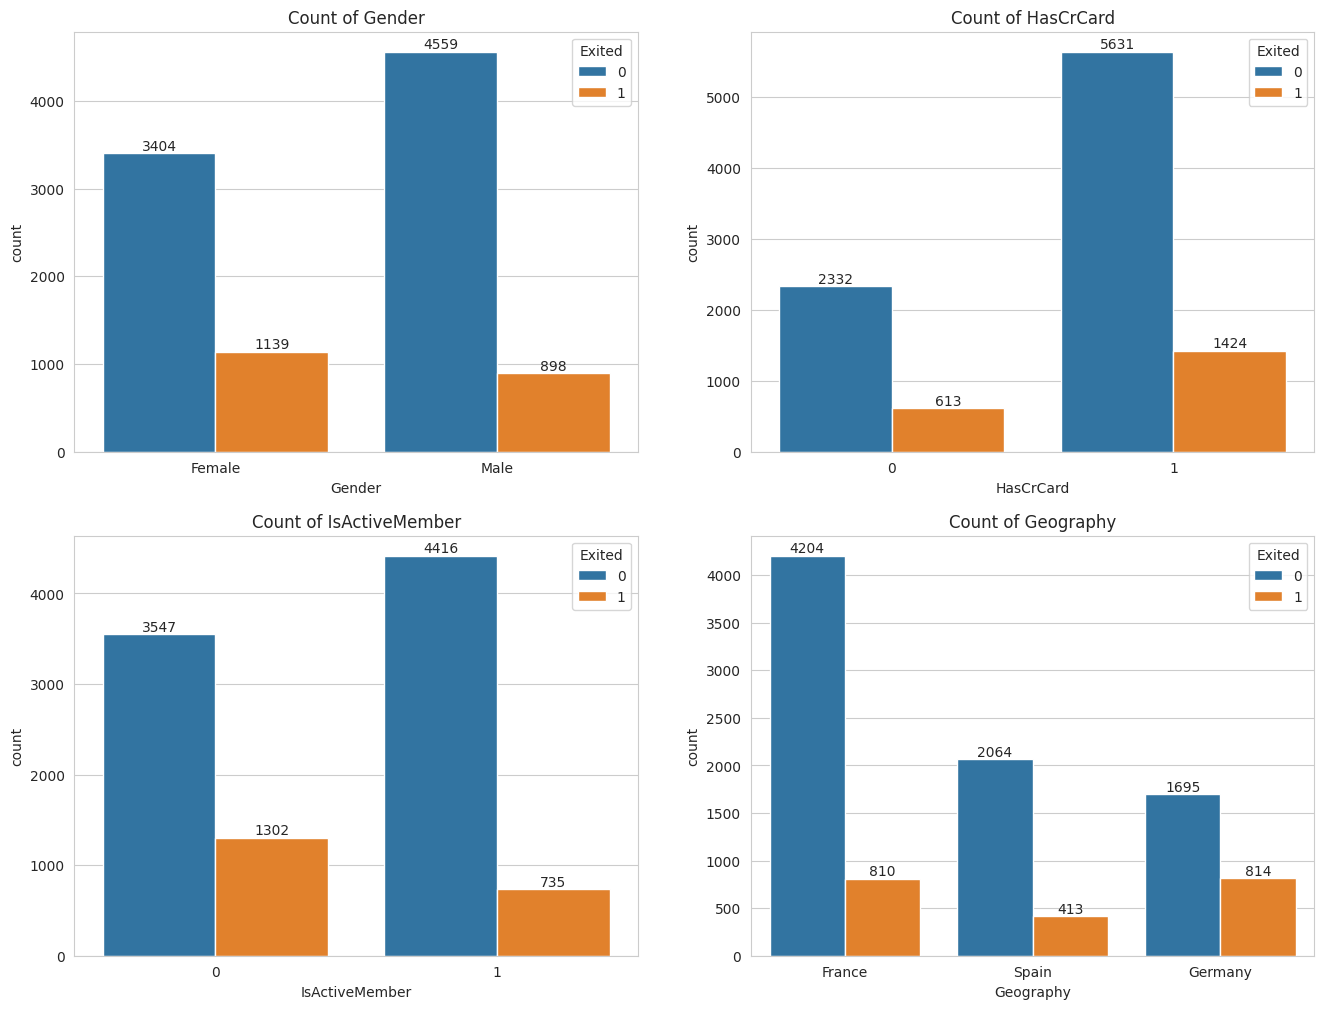

In [57]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data = df, x = i, hue = "Exited")
    for k in ax.containers:
        ax.bar_label(k)
    plt.title(f"Count of {i}")

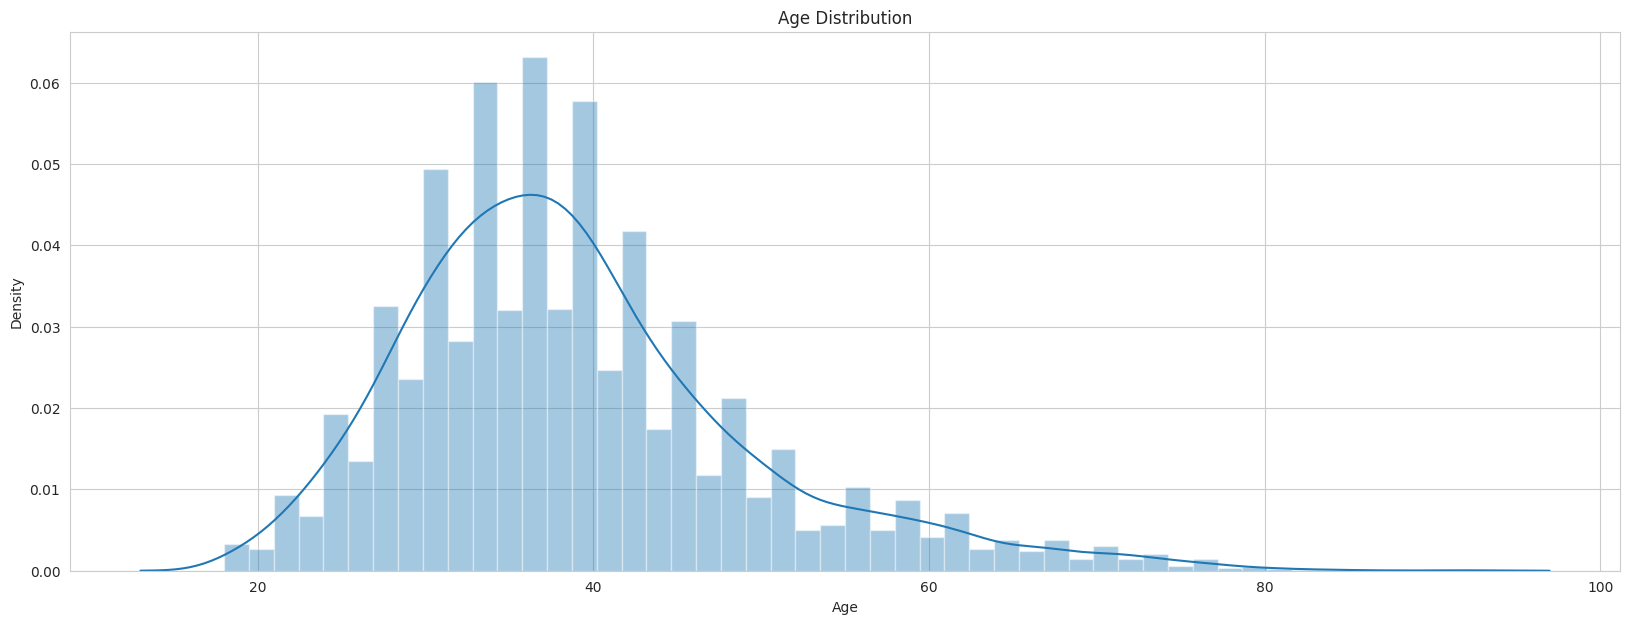

In [58]:
plt.figure(figsize=(20, 7))
sns.distplot(df["Age"])
plt.title("Age Distribution");

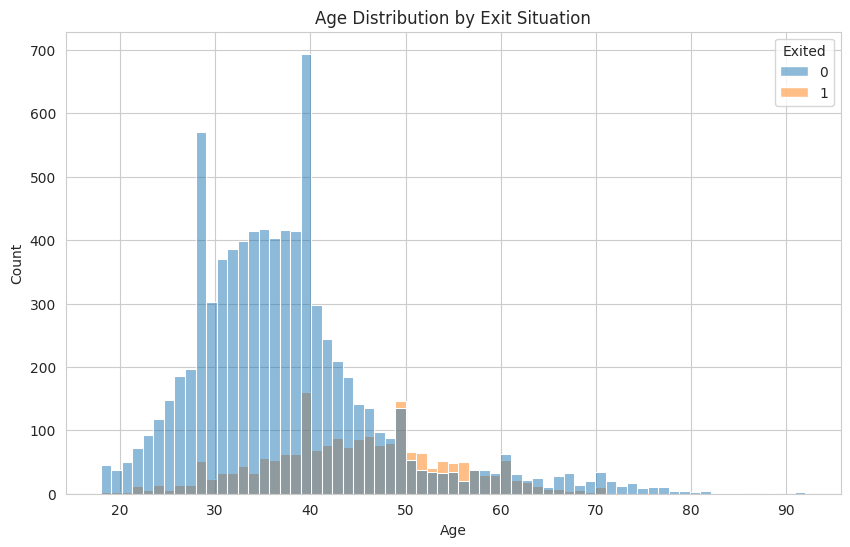

In [59]:
sns.histplot(data = df, x = "Age", hue = "Exited")
plt.title("Age Distribution by Exit Situation");

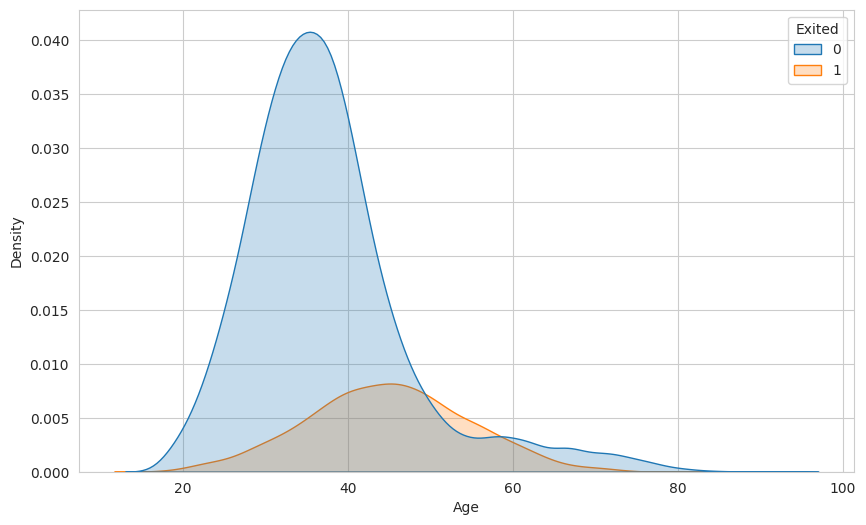

In [60]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill = True);

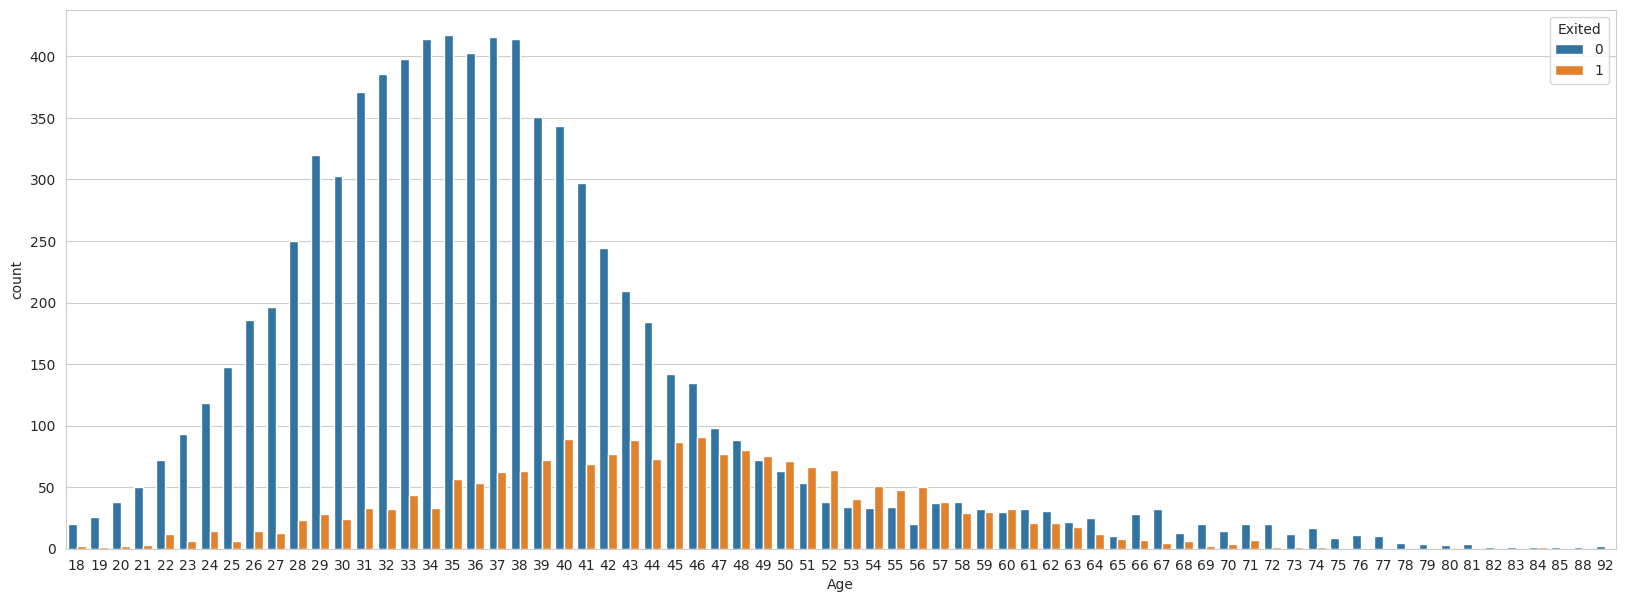

In [61]:
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Age", hue = "Exited");

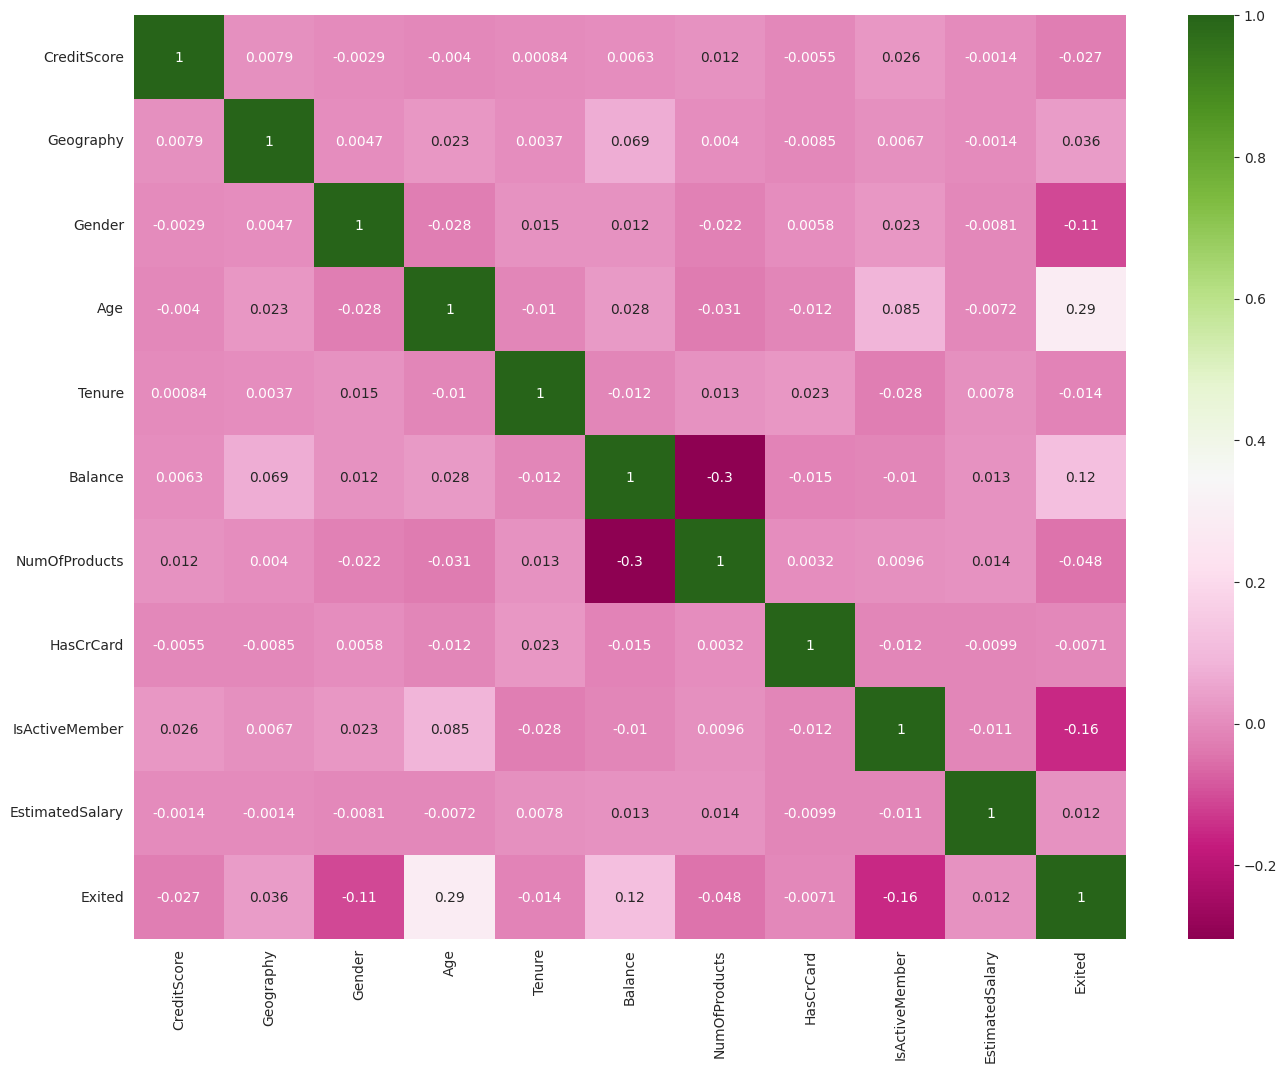

In [143]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG");

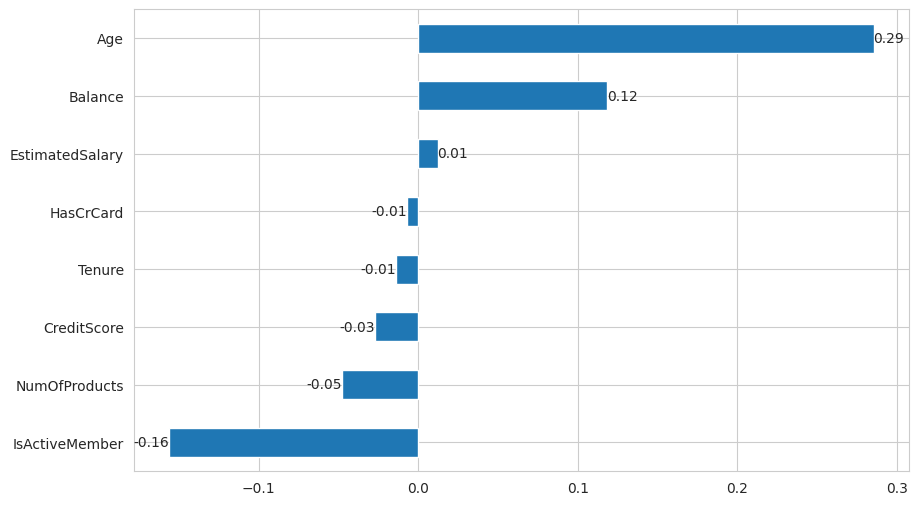

In [63]:
ax = df.corr()["Exited"][:-1].sort_values().plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [65]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# We used a one-hot encoder here because it is more convenient than pd.get_dummies.
#When a different geography input is encountered, the model will not throw an error; it will simply ignore it."

# Preprocessing of Data
- Train | Test Split, Scalling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [67]:
seed = 42

In [68]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)
#This ensures that the train-test split is done in a way that maintains the same class distribution as the original dataset."

In [70]:
scaler = MinMaxScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [72]:
X_train.shape

(9000, 10)

## without class_weigth

### Create The Model

In [73]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1])) # Başlangıç olarak feature sayısının 1.5 katını seçtik.
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001) #we started with the default value
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [74]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose = 1)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.5494 - recall: 0.0000e+00 - val_loss: 0.4994 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4960 - recall: 0.0000e+00 - val_loss: 0.4837 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4822 - recall: 0.0000e+00 - val_loss: 0.4701 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4725 - recall: 0.0000e+00 - val_loss: 0.4612 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4637 - recall: 0.0000e+00 - val_loss: 0.4530 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4556 - recall: 0.0000e+00 - val_loss: 0.4446 - val_recall: 0.0000e+00
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4493 - recall: 0.0000e+00 - val_loss: 0.4369 - val_reca

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 479 (1.87 KB)
Trainable params: 479 (1.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

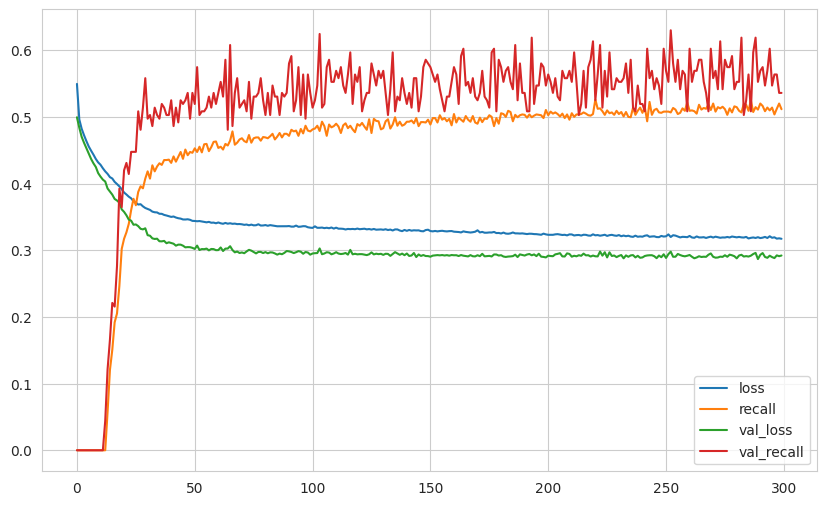

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Here, our recall score for the target class is 0.49, which is very poor. This indicates that there is definitely an imbalance in our data.
# Therefore, we will retrain the model using class_weight to address this issue."

32/32 [==============================] - 0s 1ms/step
[[761  35]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.74      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 2ms/step


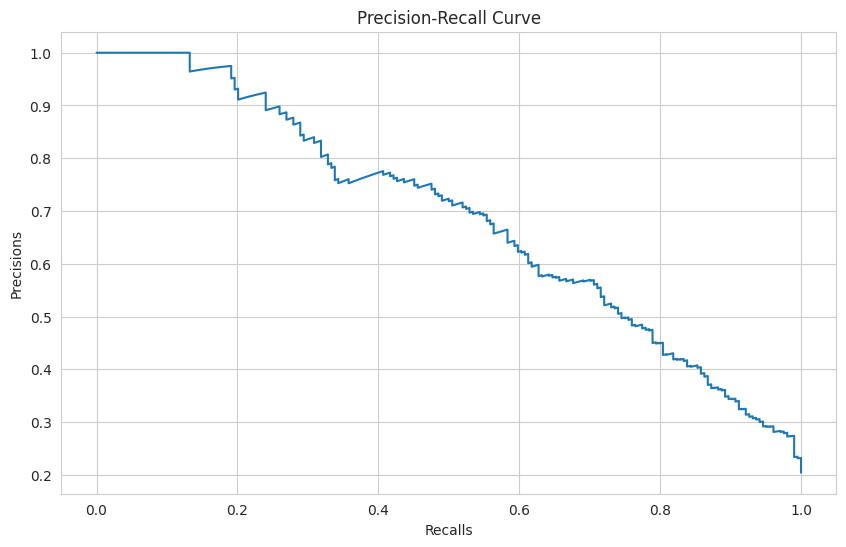

In [78]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

#In the case of imbalanced data, we interpret the Precision-Recall Curve to analyze the performance of the model.

In [79]:
average_precision_score(y_test, y_pred_proba)

0.6870109638767657

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [80]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [81]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights
# Here, the coefficients were adjusted based on the data quantities. These coefficients can also be manually adjusted.
#The number of instances for Exited = 0 was four times the number of instances for Exited = 1.
# Therefore, a lower coefficient was assigned to 0 and a coefficient four times higher was assigned to 1, effectively balancing the classes.

{0: 0.6278777731268314, 1: 2.454991816693944}

In [82]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 300,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6806 - recall: 0.3226 - val_loss: 0.6276 - val_recall: 0.4917
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6627 - recall: 0.5285 - val_loss: 0.6293 - val_recall: 0.7293
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6427 - recall: 0.6289 - val_loss: 0.5976 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6252 - recall: 0.6568 - val_loss: 0.5727 - val_recall: 0.6464
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6107 - recall: 0.6810 - val_loss: 0.5904 - val_recall: 0.7017
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5986 - recall: 0.6992 - val_loss: 0.5227 - val_recall: 0.6077
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5909 - recall: 0.6877 - val_loss: 0.5676 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

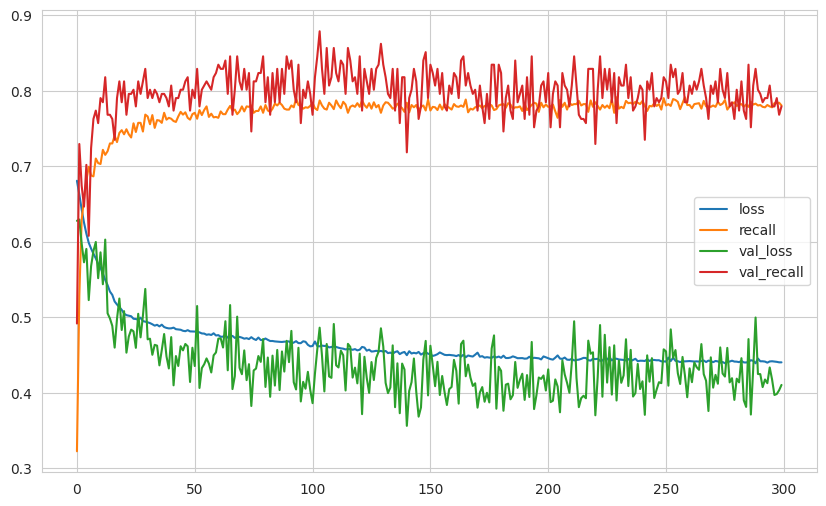

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [84]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Using class weights resulted in more reliable recall scores. However, in this case, the precision scores decreased.
#It is important to note that there is often a trade-off between precision and recall when dealing with imbalanced data.
# By assigning higher weights to the minority class, we improve recall but may see a decrease in precision

32/32 [==============================] - 0s 1ms/step
[[632 164]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       796
           1       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.81      1000



32/32 [==============================] - 0s 1ms/step


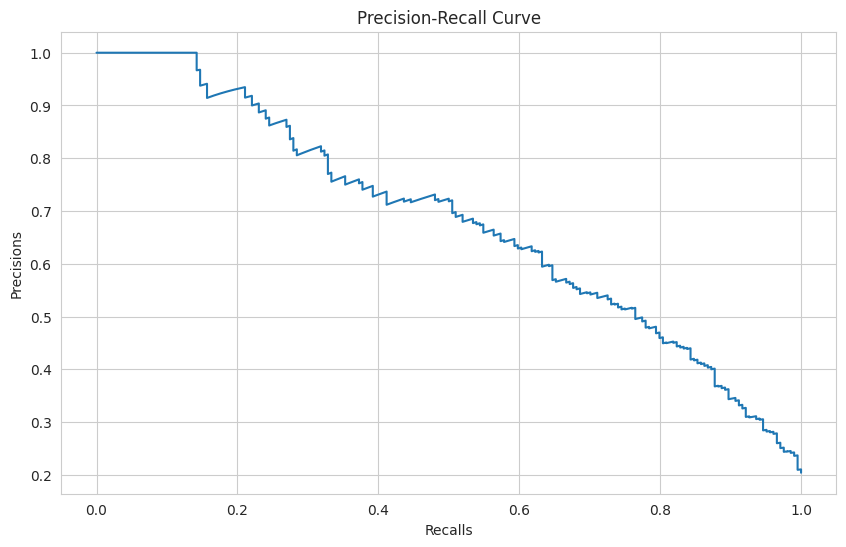

In [85]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [86]:
average_precision_score(y_test, y_pred_proba)

0.6801042827152269

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [87]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [88]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.6916 - recall: 0.1235 - val_loss: 0.6613 - val_recall: 0.2928
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6799 - recall: 0.3317 - val_loss: 0.6344 - val_recall: 0.5359
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6544 - recall: 0.6362 - val_loss: 0.6194 - val_recall: 0.6851
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6298 - recall: 0.6622 - val_loss: 0.5901 - val_recall: 0.6519
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6145 - recall: 0.6786 - val_loss: 0.5899 - val_recall: 0.6851
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6038 - recall: 0.6828 - val_loss: 0.5285 - val_recall: 0.5967
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.5977 - recall: 0.6798 - val_loss: 0.5712 - val_recall: 0.6961
Epoch 8/1000
64/64 [==============

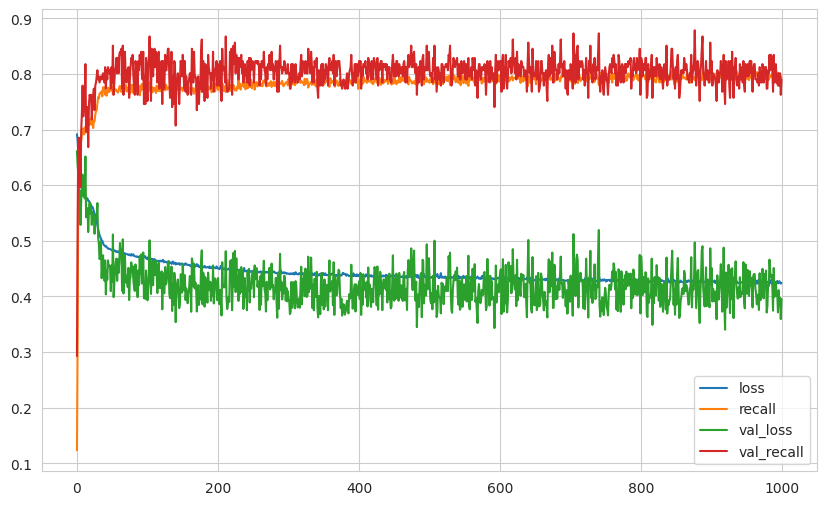

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#From the graph, we can observe that the model is starting to exhibit signs of overfitting. To prevent overfitting, we can consider adding dropout layers
# or implementing early stopping.
#1 Dropout: Adding dropout layers can help regularize the model and reduce overfitting. Dropout randomly sets a fraction of input units to 0 during training,
#which helps prevent the model from relying too heavily on specific features.
#2 Early stopping: Implementing early stopping allows us to monitor the validation loss during training and stop the training process early if the loss starts to increase.
# This helps prevent the model from overfitting to the training data.
#By incorporating dropout layers or early stopping, we can mitigate the effects of overfitting and improve the generalization ability of the model."

In [90]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[636 160]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       796
           1       0.48      0.73      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.78      0.80      1000



### Add Dropout Layer

In [91]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [92]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 400,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/400
64/64 [==============================] - 1s 6ms/step - loss: 0.7077 - recall: 0.4619 - val_loss: 0.6922 - val_recall: 0.5083
Epoch 2/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6942 - recall: 0.7155 - val_loss: 0.6942 - val_recall: 0.7790
Epoch 3/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6837 - recall: 0.7349 - val_loss: 0.6604 - val_recall: 0.5028
Epoch 4/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6766 - recall: 0.6598 - val_loss: 0.6479 - val_recall: 0.5967
Epoch 5/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6670 - recall: 0.6556 - val_loss: 0.6544 - val_recall: 0.7127
Epoch 6/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6623 - recall: 0.6804 - val_loss: 0.6294 - val_recall: 0.6906
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6555 - recall: 0.6065 - val_loss: 0.6330 - val_recall: 0.7072
Epoch 8/400
64/64 [======================

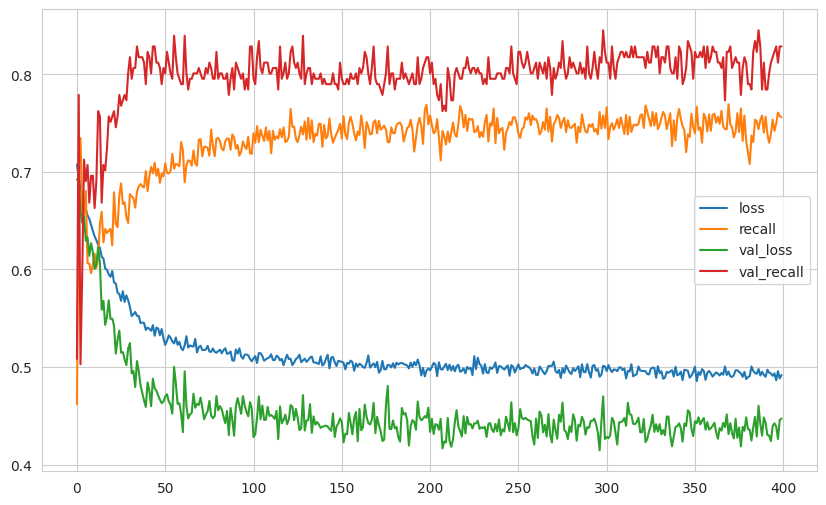

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [94]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Dropout regularization can effectively prevent overfitting by randomly dropping out units during training, thus reducing the model's reliance on specific features
#and improving generalization.

32/32 [==============================] - 0s 2ms/step
[[577 219]
 [ 38 166]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       796
           1       0.43      0.81      0.56       204

    accuracy                           0.74      1000
   macro avg       0.68      0.77      0.69      1000
weighted avg       0.83      0.74      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [95]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])


In [96]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [97]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 400,
          verbose = 1,
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/400
64/64 [==============================] - 2s 7ms/step - loss: 0.6920 - recall: 0.4915 - val_loss: 0.6834 - val_recall: 0.7238
Epoch 2/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6845 - recall: 0.5932 - val_loss: 0.6592 - val_recall: 0.6851
Epoch 3/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6808 - recall: 0.6731 - val_loss: 0.6548 - val_recall: 0.7127
Epoch 4/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6711 - recall: 0.7028 - val_loss: 0.6249 - val_recall: 0.6188
Epoch 5/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6693 - recall: 0.6895 - val_loss: 0.6661 - val_recall: 0.7569
Epoch 6/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6608 - recall: 0.7119 - val_loss: 0.6339 - val_recall: 0.7017
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6559 - recall: 0.6798 - val_loss: 0.6525 - val_recall: 0.7403
Epoch 8/400
64/64 [======================

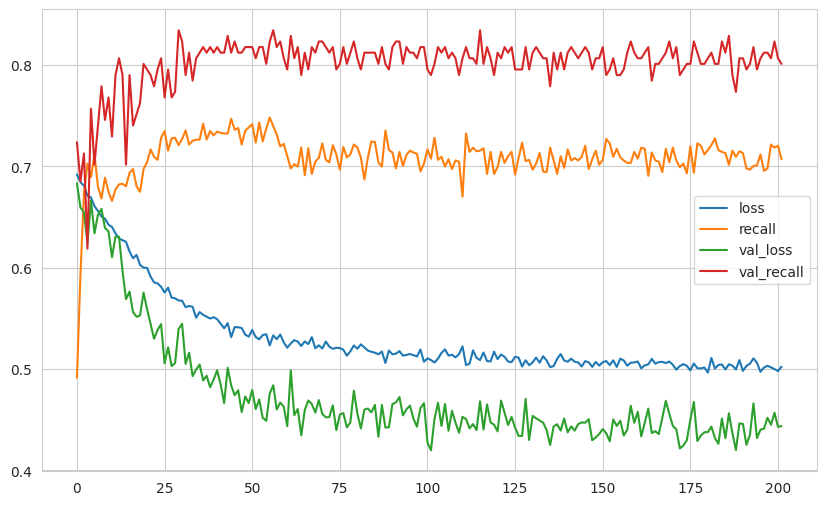

In [98]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [99]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[639 157]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.49      0.73      0.58       204

    accuracy                           0.79      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



#### Monitor the "val_recall" as metric

In [100]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])
# if we had set the metrics to 'accuracy' here, we could have also monitored 'val_accuracy'.
# Since we chose 'recall' as the metrics, we will monitor 'val_recall' as the evaluation metric.
#By selecting the appropriate metrics and monitoring them during training,
#we can track the performance of the model on the validation set and make informed decisions based on the chosen evaluation criteria.

In [101]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 200, restore_best_weights = True)

In [102]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.7011 - recall: 0.2113 - val_loss: 0.6670 - val_recall: 0.3260
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6902 - recall: 0.4461 - val_loss: 0.6796 - val_recall: 0.5691
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6824 - recall: 0.5684 - val_loss: 0.6518 - val_recall: 0.5193
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6748 - recall: 0.5975 - val_loss: 0.6364 - val_recall: 0.5912
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6662 - recall: 0.6368 - val_loss: 0.6348 - val_recall: 0.7072
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6573 - recall: 0.6943 - val_loss: 0.6070 - val_recall: 0.6796
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6495 - recall: 0.6840 - val_loss: 0.6389 - val_recall: 0.7624
Epoch 8/1000
64/64 [==============

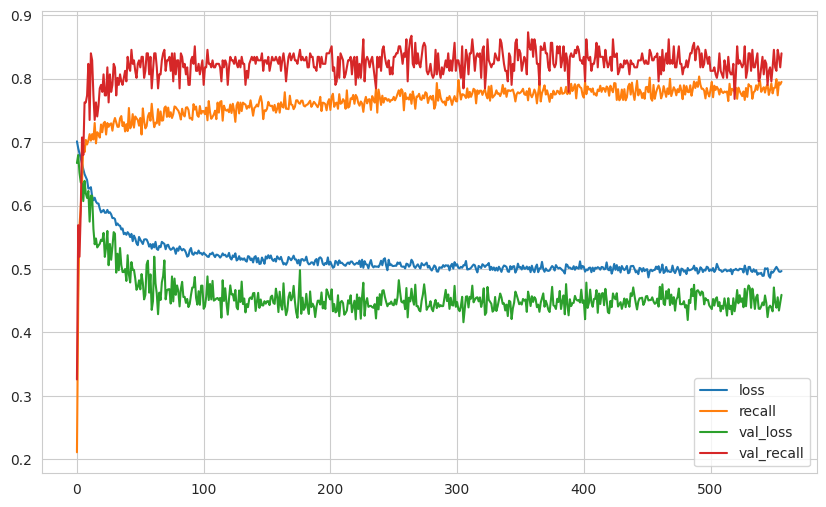

In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [104]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[586 210]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       796
           1       0.44      0.80      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.75      0.77      1000



## GridSearchCV

In [105]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [106]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 10, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 4, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = "sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = "binary_crossentropy", metrics = ["Recall"])
    return classifier

In [145]:
from sklearn.utils import class_weight

In [108]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [109]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [110]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

In [111]:
from sklearn.model_selection import GridSearchCV


In [ ]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

classifier = KerasClassifier(build_fn =  build_classifier, validation_split = 0.1, epochs = 1000)

parameters = {"batch_size" : [128, 256],
              "optimizer" : [Adam, RMSprop, Adadelta, Nadam],
              "learn_rate" : [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = "recall",
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weights)

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# GridSearch sonrası REcall score'umuz epey arttı.

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [117]:
average_precision_score(y_test, y_pred_proba)

0.6801042827152269

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

In [ ]:
grid_model.best_params_

In [120]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(units = 20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

opt = Nadam(lr = 0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          callbacks = [early_stop],
          batch_size = 256,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/1000
36/36 [==============================] - 3s 9ms/step - loss: 0.6854 - recall: 0.5559 - val_loss: 0.6743 - val_recall: 0.5392
Epoch 2/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.6663 - recall: 0.5963 - val_loss: 0.6621 - val_recall: 0.5784
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.6517 - recall: 0.6252 - val_loss: 0.6512 - val_recall: 0.6176
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.6394 - recall: 0.6470 - val_loss: 0.6359 - val_recall: 0.6422
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.6282 - recall: 0.6530 - val_loss: 0.6237 - val_recall: 0.6667
Epoch 6/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.6181 - recall: 0.6536 - val_loss: 0.6231 - val_recall: 0.6814
Epoch 7/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.6091 - recall: 0.6787 - val_loss: 0.6034 - val_recall: 0.6667
Epoch 8/1000
36/36 [==============

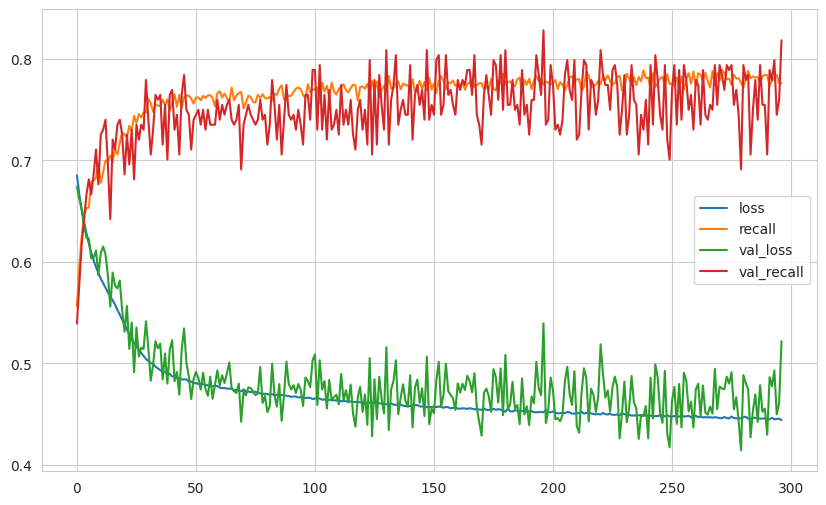

In [121]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [122]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[556 240]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       796
           1       0.41      0.83      0.55       204

    accuracy                           0.73      1000
   macro avg       0.68      0.76      0.68      1000
weighted avg       0.83      0.72      0.75      1000



In [123]:
model.save("model.churn.h5")

## Prediction

In [124]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer

CreditScore          619.000
Geography              0.000
Gender                 0.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [126]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [128]:
model.predict(single_customer)

1/1 [==============================] - 0s 41ms/step


array([[0.5999764]], dtype=float32)

In [129]:
df["Exited"].iloc[0]


1

## Comparison with ML

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [131]:
clf1 = RandomForestClassifier(random_state = seed, class_weight = "balanced")
clf2 = SVC(probability = True, random_state = seed, class_weight = "balanced")
clf3 = LogisticRegression(random_state = seed, class_weight = "balanced")

In [132]:
param1 = {}
param1["classifier__n_estimators"] = [10, 50, 100, 250]
param1["classifier__max_depth"] = [5, 10, 20]
param1["classifier"] = [clf1]

param2 = {}
param2["classifier__C"] = [0.01, 0.1, 1, 10, 100]
param2["classifier"] = [clf2]

param3 = {}
param3["classifier__C"] = [0.01, 0.1, 1, 10, 100]
param3["classifier__penalty"] = ["l1", "l2"]
param3["classifier"] = [clf3]

In [133]:
display(param1, param2, param3)

{'classifier__n_estimators': [10, 50, 100, 250],
 'classifier__max_depth': [5, 10, 20],
 'classifier': [RandomForestClassifier(class_weight='balanced', random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier': [SVC(class_weight='balanced', probability=True, random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__penalty': ['l1', 'l2'],
 'classifier': [LogisticRegression(class_weight='balanced', random_state=42)]}

In [134]:
pipeline = Pipeline([("classifier", clf1)])
params = [param1, param2, param3]

In [135]:
pipeline

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [136]:
grid_model = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1, scoring = "recall")
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(class_weight='balanced',
                                                                random_state=42)],
                          'classifier__max_depth': [5, 10, 20],
                          'classifier__n_estimators': [10, 50, 100, 250]},
                         {'classifier': [SVC(C=10, class_weight='balanced',
                                             probability=True,
                                             random_state=42)],
                          'classifier__C': [0.01, 0.1, 1, 10, 100]},
                         {'classifier': [LogisticRegression(class_weight='balanced',
                                                            random_state=42)],
                          'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l1', 'l2']}],
             scoring='recall')

In [137]:
grid_model.best_params_

{'classifier': SVC(C=10, class_weight='balanced', probability=True, random_state=42),
 'classifier__C': 10}

In [138]:
grid_model.best_score_

0.7206801566385252

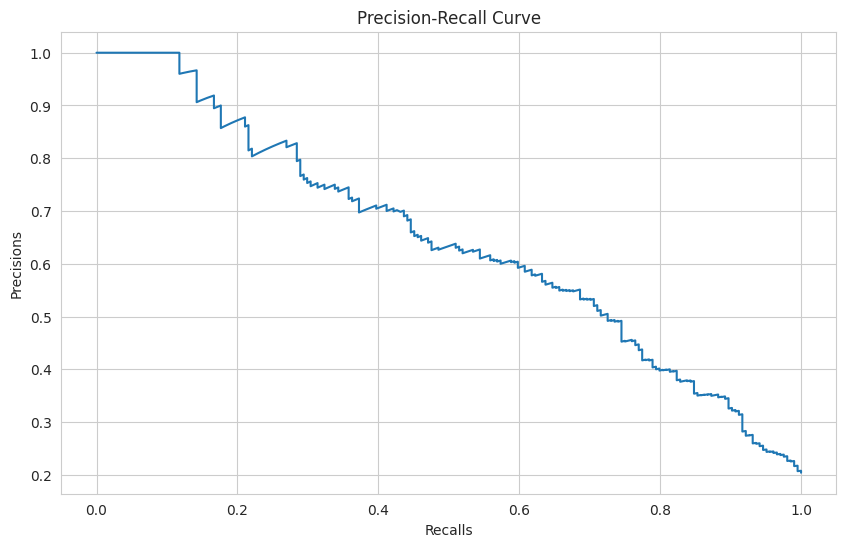

In [139]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "RF")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [140]:
average_precision_score(y_test, y_pred_proba)

0.6423700314445301

In [141]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[627 169]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.83      0.78      0.79      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___